In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("../clean_dataset/enrolment_clean_dataset.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006007 entries, 0 to 1006006
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006007 non-null  object
 1   state           1006007 non-null  object
 2   district        1006007 non-null  object
 3   pincode         1006007 non-null  int64 
 4   age_0_5         1006007 non-null  int64 
 5   age_5_17        1006007 non-null  int64 
 6   age_18_greater  1006007 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [35]:
df.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [36]:
df.shape

(1006007, 7)

In [38]:
df["total_enrolment"] = df["age_0_5"] + df["age_5_17"] + df["age_18_greater"]
df['date'] = pd.to_datetime(df['date'], dayfirst=True, format='mixed', errors='coerce')

In [9]:
df["total_enrolment"].head(5)

0    109
1     86
2    123
3    106
4     51
Name: total_enrolment, dtype: int64

In [10]:
## visualize this dataset

In [12]:
print(f"total enrolment: {df["total_enrolment"].sum()}")

total enrolment: 5435484


In [13]:
# A. Age Group Analysis

In [14]:
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']
age_sums = df[age_cols].sum()
print("\nAge Group Distribution:\n", age_sums)


Age Group Distribution:
 age_0_5           3546965
age_5_17          1720383
age_18_greater     168136
dtype: int64


In [15]:
# B. State-wise Analysis

In [23]:
state_stats = df.groupby('state')[['total_enrolment'] + age_cols].sum()
state_stats = state_stats.sort_values("total_enrolment",ascending=False)

In [26]:
state_stats

,total_enrolment,age_0_5,age_5_17,age_18_greater
state,,,,
Uttar Pradesh,1018629,521045,479682,17902
Bihar,609585,262875,334802,11908
Madhya Pradesh,493970,367990,116381,9599
West Bengal,375340,275420,91410,8510
Maharashtra,369139,278814,82116,8209
Rajasthan,348458,229780,113123,5555
Gujarat,280549,193031,71182,16336
Assam,230197,141235,66085,22877
Karnataka,223235,179262,33863,10110


In [27]:
top_10_states = state_stats.head(10)

In [28]:
top_10_states

,total_enrolment,age_0_5,age_5_17,age_18_greater
state,,,,
Uttar Pradesh,1018629,521045,479682,17902
Bihar,609585,262875,334802,11908
Madhya Pradesh,493970,367990,116381,9599
West Bengal,375340,275420,91410,8510
Maharashtra,369139,278814,82116,8209
Rajasthan,348458,229780,113123,5555
Gujarat,280549,193031,71182,16336
Assam,230197,141235,66085,22877
Karnataka,223235,179262,33863,10110


In [29]:
# C. Time Series Analysis (Monthly Trend)

In [42]:
monthly_trend = df.set_index('date')[['total_enrolment']].resample('ME').sum()

In [43]:
monthly_trend

,total_enrolment
date,
2025-03-31,16582
2025-04-30,257438
2025-05-31,183616
2025-06-30,215734
2025-07-31,616868
2025-08-31,0
2025-09-30,1475867
2025-10-31,817919
2025-11-30,1091996


In [44]:
# D. District Analysis for Top State (Uttar Pradesh)

In [48]:
up_data = df[df['state'] == 'Uttar Pradesh']
top_districts_up = up_data.groupby('district')['total_enrolment'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Districts in UP:\n", top_districts_up)


Top 10 Districts in UP:
 district
Bahraich        39338
Sitapur         30854
Agra            29910
Bareilly        27811
Aligarh         26192
Lucknow         25514
Hardoi          25193
Kanpur Nagar    24708
Kheri           24578
Shahjahanpur    24291
Name: total_enrolment, dtype: int64


In [49]:
# E. Age Composition for Top 5 States (Percentage) 

In [56]:
top_5_states_names = top_10_states.head(5).index
top_5_age_comp = state_stats.loc[top_5_states_names, age_cols]

In [57]:
top_5_age_comp

,age_0_5,age_5_17,age_18_greater
state,,,
Uttar Pradesh,521045,479682,17902
Bihar,262875,334802,11908
Madhya Pradesh,367990,116381,9599
West Bengal,275420,91410,8510
Maharashtra,278814,82116,8209


In [58]:
# Normalize to get percentages
top_5_age_pct = top_5_age_comp.div(top_5_age_comp.sum(axis=1), axis=0) * 100

In [59]:
top_5_age_pct

,age_0_5,age_5_17,age_18_greater
state,,,
Uttar Pradesh,51.151597,47.090943,1.757460
Bihar,43.123600,54.922939,1.953460
Madhya Pradesh,74.496427,23.560338,1.943235
West Bengal,73.378803,24.353919,2.267278
Maharashtra,75.530898,22.245279,2.223824


In [60]:
# 3. Visualizations

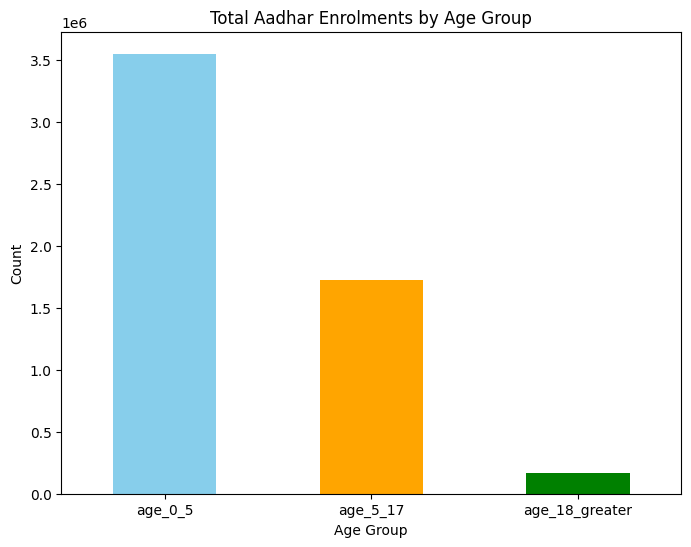

In [61]:
#Plot 1: Age Group Distribution
plt.figure(figsize=(8, 6))
age_sums.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Total Aadhar Enrolments by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.savefig('age_distribution.png')
plt.show()

C:\Users\ytsub\AppData\Local\Temp\ipykernel_11952\2415423034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states['total_enrolment'], y=top_10_states.index, palette='viridis')


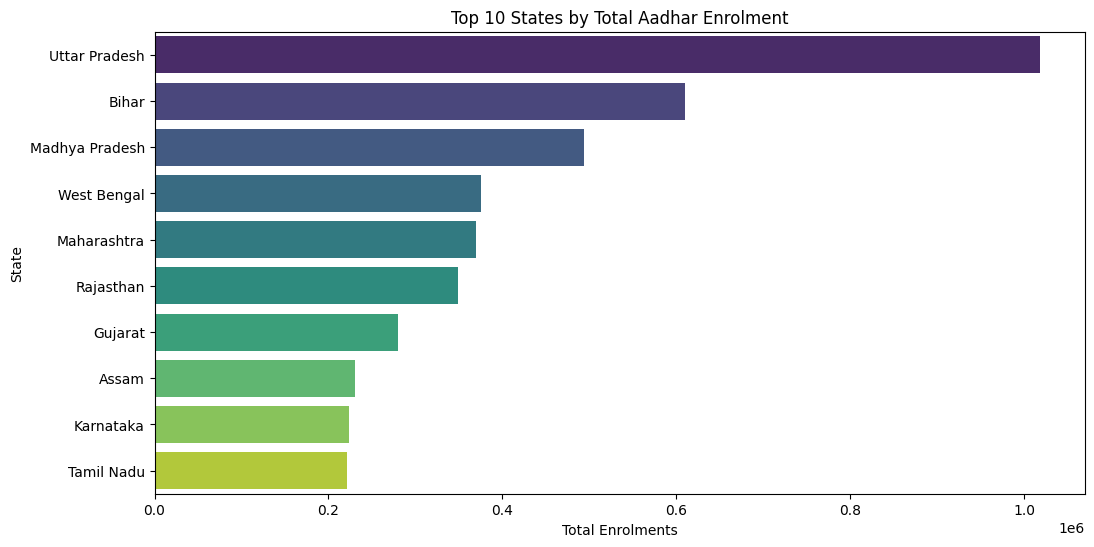

In [64]:
# Plot 2: Top 10 States by Total Enrolment
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states['total_enrolment'], y=top_10_states.index, palette='viridis')
plt.title('Top 10 States by Total Aadhar Enrolment')
plt.xlabel('Total Enrolments')
plt.ylabel('State')
plt.savefig('top_states.png')
plt.show()

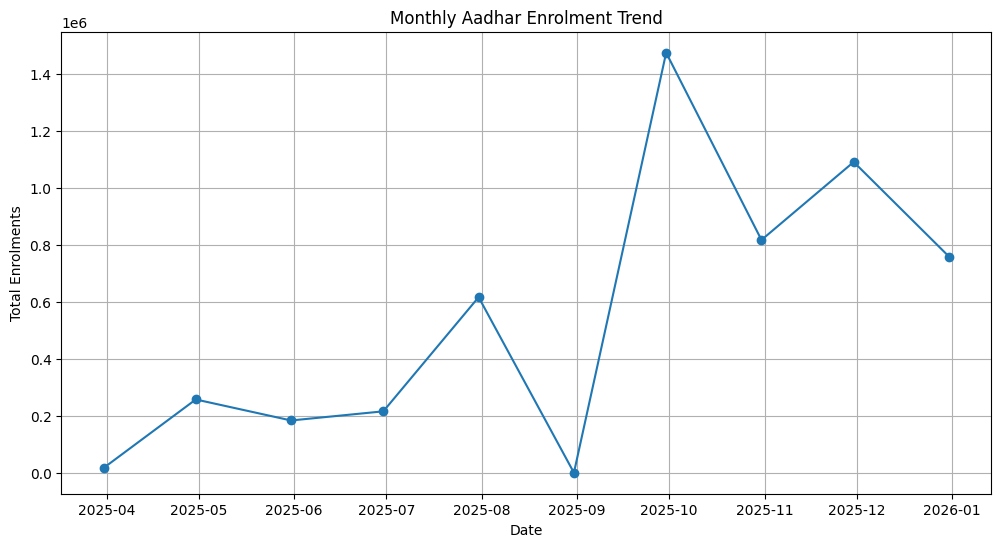

In [65]:
# Plot 3: Monthly Enrolment Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend['total_enrolment'], marker='o')
plt.title('Monthly Aadhar Enrolment Trend')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.grid(True)
plt.savefig('enrolment_trend.png')
plt.show()

C:\Users\ytsub\AppData\Local\Temp\ipykernel_11952\3799482026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts_up.values, y=top_districts_up.index, palette='magma')


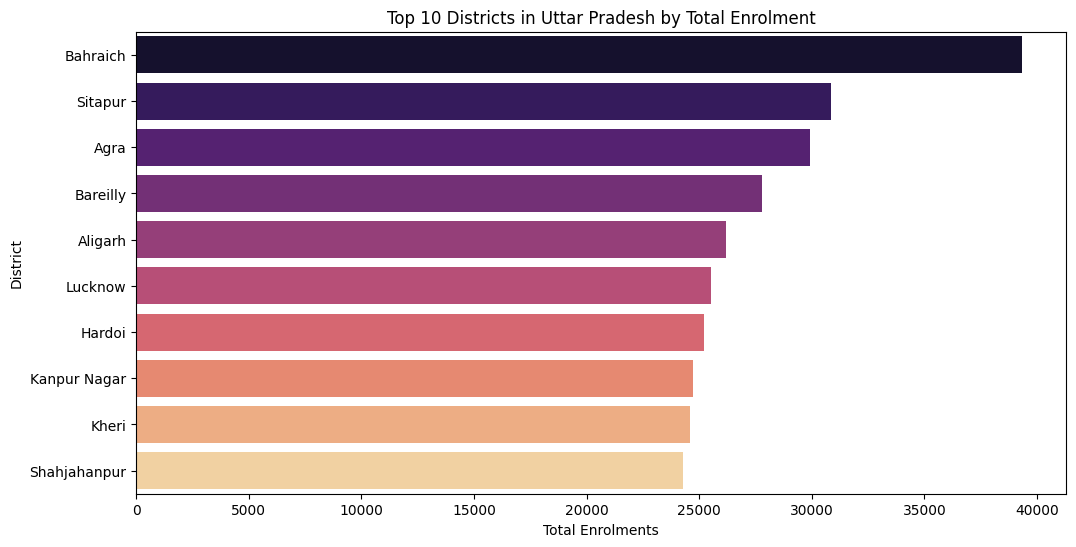

In [66]:
# Plot 4: Top 10 Districts in Uttar Pradesh
plt.figure(figsize=(12, 6))
sns.barplot(x=top_districts_up.values, y=top_districts_up.index, palette='magma')
plt.title('Top 10 Districts in Uttar Pradesh by Total Enrolment')
plt.xlabel('Total Enrolments')
plt.ylabel('District')
plt.savefig('top_districts_up.png')
plt.show()

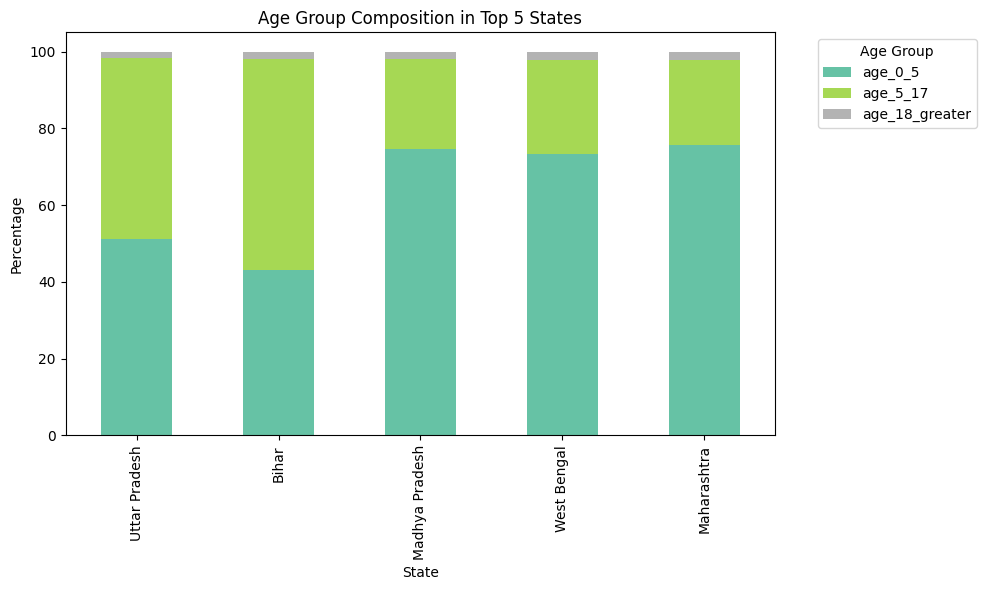

In [67]:
# Plot 5: Age Composition in Top 5 States (Stacked Bar)
top_5_age_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Age Group Composition in Top 5 States')
plt.ylabel('Percentage')
plt.xlabel('State')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('age_composition_top5.png')
plt.show()   